# Gregorian to Hijri Analysis


Gregorian to Hijri Calender Analysis

1. Hijri Calender is the Calender that is based on Lunar cycle
2. Gregorian Calender is the Calender that is based on Solar Cycle
3. Hijri Calender and Gregorian Calender has about 11.25 days of difference
4. Means Hijri Calender has 11.35 days than Gregorian Calender due to its purely based on moon.
5. Until this year the difference between Hijri and Gregorian is 6 months
6. It means it took 16 years for hijri calender to accumulate with gregorian calender
7. Further more for every 32 years of gregorian calender hijri calender is 1 year ahead
8. And for every 100 years of gregorian calender, hijri calender will be 3 years ahead means it is 103.25 approx years


In [32]:
import requests

# Setting up the api request

def fetch_hijri_date(gregorian_date):
    """
    Fetch Hijri date for a given gregorian date using aladhan app
    
    :param gregorian_date: Date in 'YYYY-MM-DD' format
    :return Hijri date as string or None if the request fails
    """
    day,month,year = gregorian_date.split('-')[2],gregorian_date.split('-')[1],gregorian_date.split('-')[0]
    formated_date = f"{day}-{month}-{year}"
    url = f"https://api.aladhan.com/v1/gToH?date={formated_date}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data["code"] == 200:
            return data["data"]["hijri"]["date"]
    return None

# Fetch data for a range of dates

import pandas as pd

def create_date_dataset(start_date,end_date):
    """
    Fetch Hijri dates for a range of Gregorian dates and save to a CSV file.
    
    :param start_date: Start of the date range (YYYY-MM-DD)
    :param end_date: End of the date range (YYYY-MM-DD)
    """
    dates = pd.date_range(start=start_date,end = end_date).strftime('%Y-%m-%d')
    data = {"Gregorian":[],"Hijri_date":[]}
    
    for date in dates:
        hijri_date = fetch_hijri_date(date)
        if hijri_date:
            data["Gregorian"].append(date)
            data["Hijri_date"].append(hijri_date)
        else:
            print(f"Failed to fetch Hijri date for {date}")
    #Convert to dataframe and save to csv
    df = pd.DataFrame(data)
    df.to_csv("Hijri_gregorian_dates.csv",index=False)
    print("Data Successfully saved to Hijri_gregorian_dates.csv")
    
#Example dataset
create_date_dataset("2023-01-01","2025-01-01")

# lets do some of the cleaning and analysis in the data
df = pd.read_csv('Hijri_gregorian_dates.csv')
df

Data Successfully saved to Hijri_gregorian_dates.csv


,Gregorian,Hijri_date
0,2023-01-01,08-06-1444
1,2023-01-02,09-06-1444
2,2023-01-03,10-06-1444
3,2023-01-04,11-06-1444
4,2023-01-05,12-06-1444
...,...,...
727,2024-12-28,27-06-1446
728,2024-12-29,28-06-1446
729,2024-12-30,29-06-1446
730,2024-12-31,30-06-1446


In [33]:
df.head()

,Gregorian,Hijri_date
0,2023-01-01,08-06-1444
1,2023-01-02,09-06-1444
2,2023-01-03,10-06-1444
3,2023-01-04,11-06-1444
4,2023-01-05,12-06-1444


In [36]:
df.describe()

,Gregorian,Hijri_date
count,732,732
unique,732,732
top,2025-01-01,01-07-1446
freq,1,1


In [47]:
#Extarct Months
df["Gregorian_month"] = pd.to_datetime(df["Gregorian"]).dt.month
df["Hijri_Month"] = df["Hijri_date"].str.split("-").str[1].astype(int)
df["Difference"] = abs(df["Gregorian_month"] - df["Hijri_Month"])
print(f"The Difference in months is {difference}")
df

The Difference in months is -5


,Gregorian,Hijri_date,Gregorian_month,Hijri_Month,Difference
0,2023-01-01,08-06-1444,1,6,5
1,2023-01-02,09-06-1444,1,6,5
2,2023-01-03,10-06-1444,1,6,5
3,2023-01-04,11-06-1444,1,6,5
4,2023-01-05,12-06-1444,1,6,5
...,...,...,...,...,...
727,2024-12-28,27-06-1446,12,6,6
728,2024-12-29,28-06-1446,12,6,6
729,2024-12-30,29-06-1446,12,6,6
730,2024-12-31,30-06-1446,12,6,6


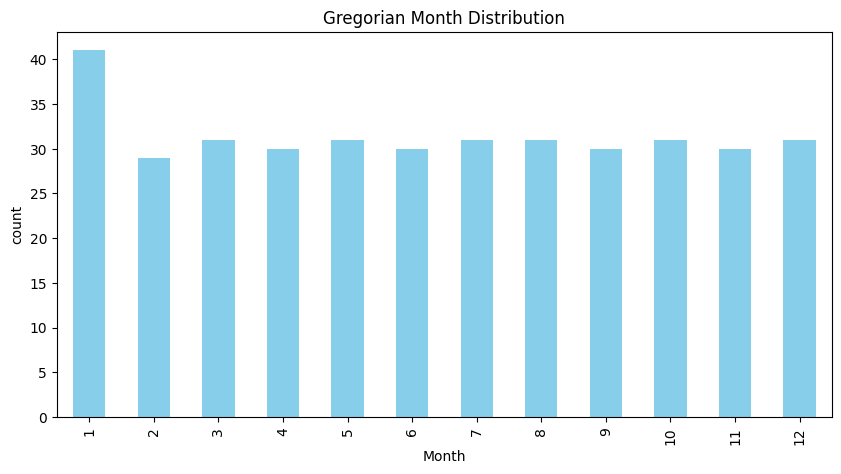

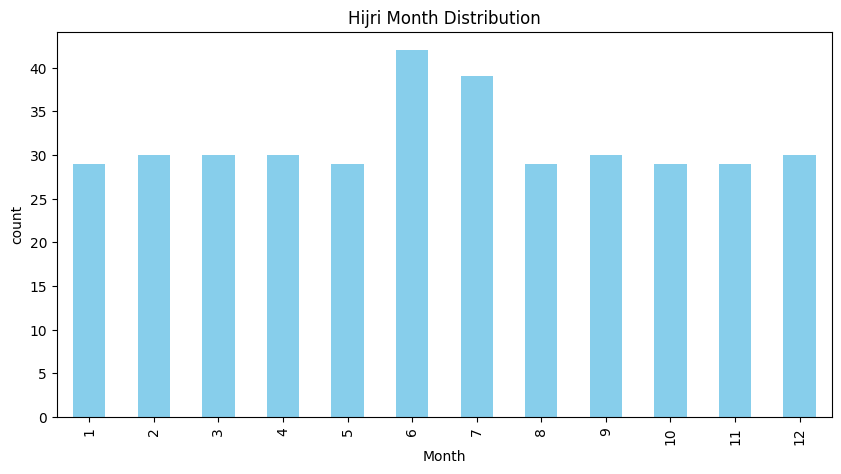

In [49]:
import matplotlib.pyplot as plt

#plot gregorian month distribution
plt.figure(figsize=(10,5))
greg_count.sort_index().plot(kind='bar',color = 'skyblue')
plt.title("Gregorian Month Distribution")
plt.xlabel("Month")
plt.ylabel("count")
plt.show()

#plot Hijri month distribution
plt.figure(figsize=(10,5))
Hijri_month_count.sort_index().plot(kind='bar',color = 'skyblue')
plt.title("Hijri Month Distribution")
plt.xlabel("Month")
plt.ylabel("count")
plt.show()

In [81]:
# Dictionary to map Hijri month numbers to names
hijri_month_map = {
    1: 'Muharram', 2: 'Safar', 3: 'Rabi al-Awwal', 4: 'Rabi al-Thani', 5: 'Jumada al-Awwal', 
    6: 'Jumada al-Thani', 7: 'Rajab', 8: 'Sha\'ban', 9: 'Ramadan', 10: 'Shawwal', 
    11: 'Dhul-Qi\'dah', 12: 'Dhul-Hijjah'
}

# Add Hijri month name column
df['Hijri_Month_Name'] = df['Hijri_Month'].map(hijri_month_map)

# Add Gregorian month name column
df['Gregorian_Month_Name'] = pd.to_datetime(df['Gregorian']).dt.strftime('%B')
df

,Gregorian,Hijri_date,Gregorian_month,Hijri_Month,Difference,Hijri_Month_Name,Gregorian_Month_Name
0,2023-01-01,08-06-1444,1,6,5,Jumada al-Thani,January
1,2023-01-02,09-06-1444,1,6,5,Jumada al-Thani,January
2,2023-01-03,10-06-1444,1,6,5,Jumada al-Thani,January
3,2023-01-04,11-06-1444,1,6,5,Jumada al-Thani,January
4,2023-01-05,12-06-1444,1,6,5,Jumada al-Thani,January
...,...,...,...,...,...,...,...
727,2024-12-28,27-06-1446,12,6,6,Jumada al-Thani,December
728,2024-12-29,28-06-1446,12,6,6,Jumada al-Thani,December
729,2024-12-30,29-06-1446,12,6,6,Jumada al-Thani,December
730,2024-12-31,30-06-1446,12,6,6,Jumada al-Thani,December


C:\Users\smdta\AppData\Local\Temp\ipykernel_7856\404223567.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(mean_1.index,rotation = 45, ha = "right")
C:\Users\smdta\AppData\Local\Temp\ipykernel_7856\404223567.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(mean_2.index,rotation = 60, ha = "right")


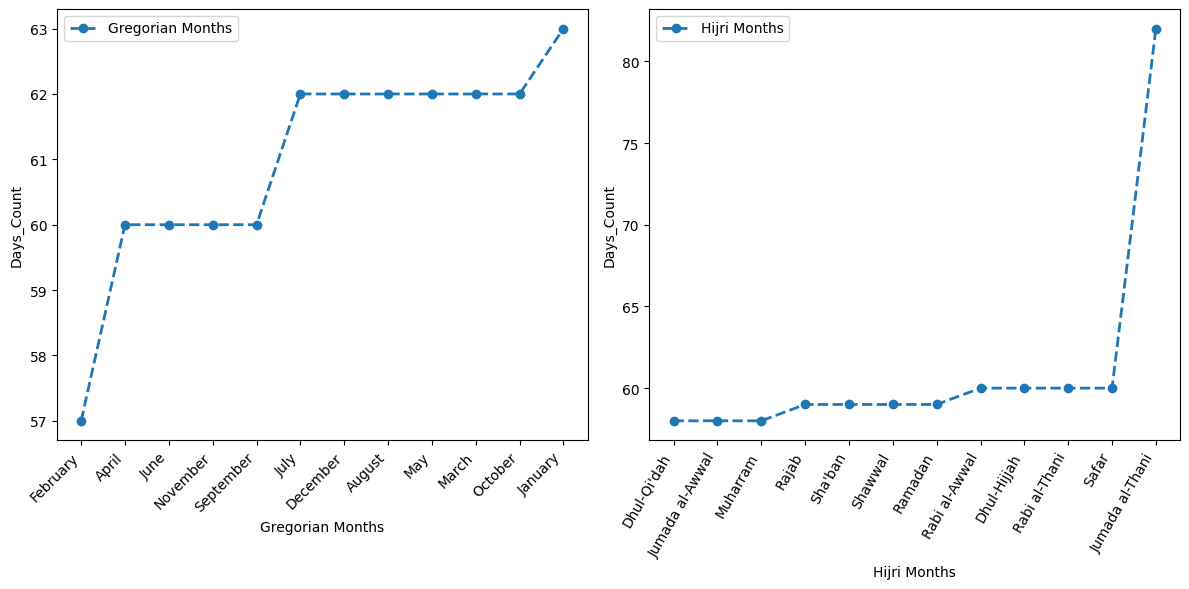

In [109]:
mean = df.groupby("Gregorian_Month_Name")["Gregorian_month"].count()
mean2 = df.groupby("Hijri_Month_Name")["Hijri_Month"].count()
mean_1 = mean.sort_values()
mean_2 = mean2.sort_values()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Gregorian months
axes[0].plot(mean_1.index, mean_1.values, linewidth=2, linestyle="--", marker="o", label="Gregorian Months")
axes[0].set_xlabel("Gregorian Months")
axes[0].set_ylabel("Days_Count")
axes[0].set_xticklabels(mean_1.index,rotation = 45, ha = "right")
axes[0].legend()

# Plot Hijri months
axes[1].plot(mean_2.index, mean_2.values, linewidth=2, linestyle="--", marker="o", label="Hijri Months")
axes[1].set_xlabel("Hijri Months")
axes[1].set_ylabel("Days_Count")
axes[1].set_xticklabels(mean_2.index,rotation = 60, ha = "right")
axes[1].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
# Group by Gregorian Month and Hijri Month
gregorian_month_counts = df.groupby("Gregorian_Month_Name")["Gregorian"].count()
hijri_month_counts = df.groupby("Hijri_Month_Name")["Hijri_date"].count()

# Ensure the months are sorted
gregorian_month_counts = gregorian_month_counts.sort_index()
hijri_month_counts = hijri_month_counts.sort_index()




In [53]:
greg_count = df["Gregorian_Month_Name"].value_counts()
print(greg_count)

hij_count = df["Hijri_Month_Name"].value_counts()
print(hij_count)

Gregorian_Month_Name
January      63
March        62
July         62
May          62
December     62
October      62
August       62
April        60
September    60
June         60
November     60
February     57
Name: count, dtype: int64
Hijri_Month_Name
Jumada al-Thani    82
Rabi al-Awwal      60
Rabi al-Thani      60
Dhul-Hijjah        60
Safar              60
Ramadan            59
Rajab              59
Sha'ban            59
Shawwal            59
Dhul-Qi'dah        58
Muharram           58
Jumada al-Awwal    58
Name: count, dtype: int64


In [56]:
import datetime
gregorian_start = '2023-01-01'
gregorian_end = '2024-01-01'

hijri_start = '01-07-1444'  
hijri_end = '01-07-1445'

greg_start = datetime.datetime.strptime(gregorian_start,"%Y-%m-%d")
greg_end = datetime.datetime.strptime(gregorian_end,"%Y-%m-%d")

hijri_start_date = datetime.datetime.strptime(hijri_start, "%d-%m-%Y")
hijri_end_date = datetime.datetime.strptime(hijri_end, "%d-%m-%Y")

gregorian_days_difference = (greg_end - greg_start).days
hijri_days_difference = (hijri_end_date - hijri_start_date).days

print(gregorian_days_difference)
print(hijri_days_difference)

 



365
365


In [63]:
pip install convertdate

     ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
     ----- ---------------------------------- 0.8/5.8 MB 10.6 MB/s eta 0:00:01
     --------- ------------------------------ 1.3/5.8 MB 3.5 MB/s eta 0:00:02
     ---------------- ----------------------- 2.4/5.8 MB 4.6 MB/s eta 0:00:01
     ------------------ --------------------- 2.6/5.8 MB 3.4 MB/s eta 0:00:01
     ----------------------------- ---------- 4.2/5.8 MB 4.3 MB/s eta 0:00:01
     ---------------------------------- ----- 5.0/5.8 MB 4.2 MB/s eta 0:00:01
     -------------------------------------- - 5.5/5.8 MB 4.2 MB/s eta 0:00:01
     -------------------------------------- - 5.5/5.8 MB 4.2 MB/s eta 0:00:01
     -------------------------------------- - 5.5/5.8 MB 4.2 MB/s eta 0:00:01
     -------------------------------------- - 5.5/5.8 MB 4.2 MB/s eta 0:00:01
     -------------------------------------- - 5.5/5.8 MB 4.2 MB/s eta 0:00:01
     -------------------------------------- - 5.5/5.8 MB 4.2 MB/s eta 

In [64]:
from convertdate import islamic
import datetime

# Define Gregorian and Hijri start and end dates
gregorian_start = '2023-01-01'
gregorian_end = '2024-01-01'

hijri_start = '01-07-1444'
hijri_end = '01-07-1445'

# Convert Gregorian dates to datetime objects
greg_start = datetime.datetime.strptime(gregorian_start, "%Y-%m-%d")
greg_end = datetime.datetime.strptime(gregorian_end, "%Y-%m-%d")

# Function to convert Hijri dates to Gregorian dates
def hijri_to_gregorian(hijri_date):
    day, month, year = map(int, hijri_date.split('-'))
    gregorian_date = islamic.to_gregorian(year, month, day)
    return datetime.date(gregorian_date[0], gregorian_date[1], gregorian_date[2])

# Convert Hijri start and end dates to Gregorian dates
hijri_start_date = hijri_to_gregorian(hijri_start)
hijri_end_date = hijri_to_gregorian(hijri_end)

# Calculate the differences in days
gregorian_days_difference = (greg_end - greg_start).days
hijri_days_difference = (hijri_end_date - hijri_start_date).days

# Print the results
print(f"Total Gregorian Days: {gregorian_days_difference} days")
print(f"Total Hijri Days: {hijri_days_difference} days")


Total Gregorian Days: 365 days
Total Hijri Days: 354 days
